# Importing all the necessary libraries and models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report

# Pandas DataFrame 

In [2]:
df=pd.read_csv(r"C:\Users\dushy\Downloads\WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# data preprossesing

In [4]:
df.drop(0,inplace=True)
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.dropna(axis=0,inplace=True)

# Feature Engineering

# One hot encoding

In [6]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [7]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [8]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    
    # Ordinal-encode the BusinessTravel column
df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
    

In [9]:
 for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
        df = onehot_encode(df, column=column)
    

In [10]:
attrition_dict = df["Attrition"].value_counts()
attrition_dict

No     1233
Yes     236
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

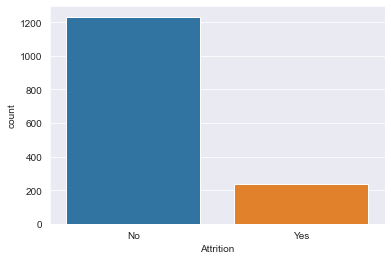

In [11]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

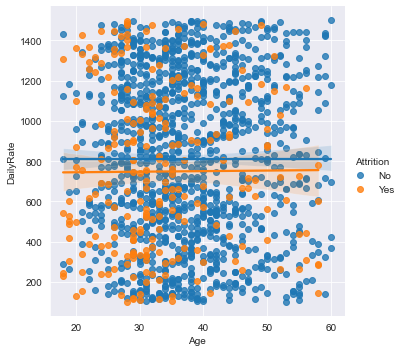

In [12]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

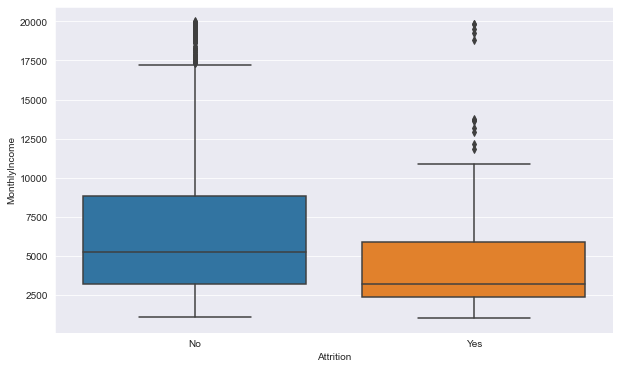

In [13]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)

# Models used:

In [14]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

# Traning And Testing Data Split

In [15]:
y = df['Attrition']
X = df.drop('Attrition', axis=1)
    

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X1=X_train
X_train.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
920,34,2,135,19,3,3,0,46,3,2,...,1,0,0,0,0,0,0,1,0,0
954,42,0,495,2,1,3,1,37,3,4,...,0,1,0,0,0,0,0,0,1,0
773,36,1,796,12,5,4,0,51,2,3,...,0,0,1,0,0,0,0,0,0,1
337,29,1,738,9,5,2,1,30,2,1,...,1,0,0,0,0,0,0,0,0,1
226,37,2,319,4,4,1,1,41,3,1,...,0,0,0,0,0,0,1,1,0,0


# Fitting Various Models With Train And Test Data

In [17]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.876596
[Logistic Regression] test data accuracy is : 0.880952
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.799320
[KNN] training data accuracy is : 0.880851
[KNN] test data accuracy is : 0.802721
[SVM] training data accuracy is : 0.859574
[SVM] test data accuracy is : 0.829932
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.860544
[Naive Bayes] training data accuracy is : 0.787234
[Naive Bayes] test data accuracy is : 0.727891


# Highest Accuracy in Training Data: Random Forest

# 2nd Highest Accuracy : Logistic Regreesion

# 3rd Highest Accuracy: KNN

In [18]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8809523809523809,
 'KNN classifier': 0.8027210884353742,
 'Support Vector Machine': 0.8299319727891157,
 'Random forest': 0.8605442176870748,
 'Decision tree': 0.7993197278911565,
 'Naive Bayes': 0.7278911564625851}

# Camparing Different Models Accuracy

In [22]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.880952,0.802721,0.829932,0.860544,0.79932,0.727891


# RANDOM FOREST :classification_report

In [19]:
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       245
         Yes       0.83      0.20      0.33        49

    accuracy                           0.86       294
   macro avg       0.85      0.60      0.63       294
weighted avg       0.86      0.86      0.82       294



# LOGISTIC REGRESSION: classification_report

In [20]:
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

          No       0.88      0.99      0.93       245
         Yes       0.89      0.33      0.48        49

    accuracy                           0.88       294
   macro avg       0.88      0.66      0.71       294
weighted avg       0.88      0.88      0.86       294



# KNN : classification_report 

In [21]:
from sklearn.metrics import classification_report

knn_y_preds = knn.predict(X_test)

print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

          No       0.85      0.93      0.89       245
         Yes       0.33      0.18      0.24        49

    accuracy                           0.80       294
   macro avg       0.59      0.56      0.56       294
weighted avg       0.76      0.80      0.78       294



# Bar Plot MODEL VS ACCURACY

<AxesSubplot:>

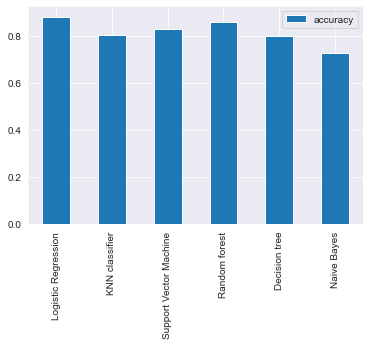

In [23]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

In [24]:
# Logistic regression
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.017041328787233554,
 'Attrition': 0.6532984134741958,
 'BusinessTravel': -0.0001500509582141988,
 'DailyRate': 0.031182517508524018,
 'DistanceFromHome': 0.07001891733788672,
 'Education': -0.27932996833716767,
 'EnvironmentSatisfaction': 0.18720887530818103,
 'Gender': 0.004484791227849476,
 'HourlyRate': -0.2213010908710209,
 'JobInvolvement': -0.05240425683294967,
 'JobLevel': -0.31031223566949834,
 'JobSatisfaction': -7.642557678175449e-05,
 'MonthlyIncome': 4.8729334663029155e-06,
 'MonthlyRate': 0.13684280730116327,
 'NumCompaniesWorked': 0.9563050611134976,
 'OverTime': -0.007657776120371362,
 'PercentSalaryHike': 0.26384199147317106,
 'PerformanceRating': -0.11892081269685187,
 'RelationshipSatisfaction': -0.2798256553747553,
 'StockOptionLevel': -0.040412124961237396,
 'TotalWorkingYears': -0.1243742755133455,
 'TrainingTimesLastYear': -0.08251784573861214,
 'WorkLifeBalance': 0.0807655850839534,
 'YearsAtCompany': -0.06979834242120232,
 'YearsInCurrentRole': 0.0675

In [28]:
# loading dependency
import joblib

# saving our model - model - model , filename - model_lr
joblib.dump(lr , 'model_lr')

# opening the file- model_jlib
m_jlib = joblib.load('model_lr')

# check prediction
m_jlib.predict(X_test) # similar output

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 

# confusion_matrix 

In [34]:
from sklearn.metrics import plot_confusion_matrix 

# RANDOM FOREST

C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


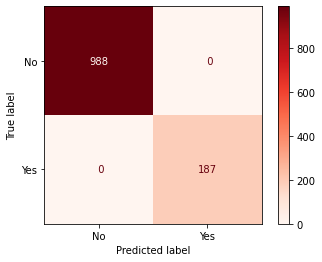

In [64]:
rm.score(X_train,y_train)
rm.fit(X_train,y_train)
disp=plot_confusion_matrix(rm,X_train,y_train,cmap="Reds",values_format='3g')

# LOGISTIC REGRESSION

C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


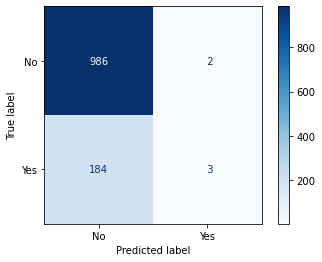

In [61]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
disp=plot_confusion_matrix(lr,X_train,y_train,cmap="Blues",values_format='3g')

# KNN

C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


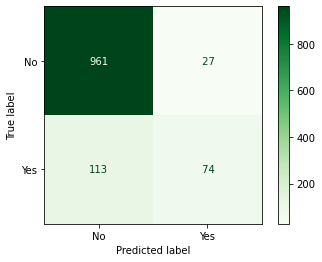

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
disp=plot_confusion_matrix(knn,X_train,y_train,cmap="Greens",values_format='3g')

# BAR PLOT : F1 SCORE & ACCURACY FOR DIFFERENT MODELS

In [40]:
d={"f1_score":[33,48,24],"accuracy":[86,88,80]}

In [41]:
from pandas import DataFrame
frame=DataFrame(d,index=["random_forest","Logistic Regression","KNN classifier"])

In [42]:
frame

,f1_score,accuracy
random_forest,33,86
Logistic Regression,48,88
KNN classifier,24,80


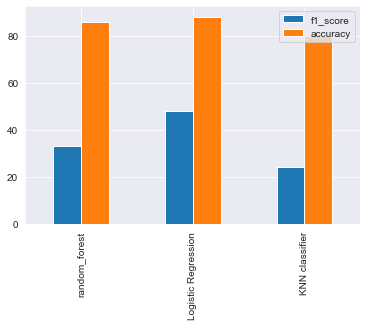

In [43]:
frame.plot(kind='bar')
plt.show()

# According to graph best model is Logistic Regression

# WHY LOGISTIC REGRESSION ?

since we can see from the graph the F1 score for "yes" is 33% for random forest and 48% for logistic regression and Accuracy for random forest is 86.05% and for logistic regression is 88% but recall of both is 99% 
so best model is Logistic regression .

In [27]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)

# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 

In [100]:
import pickle

# Save the trained model as a pickle string.
saved_model = pickle.dumps(rm)

# Load the pickled model
rm_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
rm_from_pickle.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'N

# Three examples to show accuracy of pridictions of employee attrition

# ex1:

In [50]:
employee1=[[28,0,2,791,1,4,44,3,1,3,2154,6842,0,1,1,1,3,3,0,5,2,2,4,2,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1]]
print(lr.predict_proba(employee1))

[[1.00000000e+00 2.48481283e-13]]


C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ex 2: 

In [48]:
employee2=[[40,1,2,791,1,4,44,3,1,3,3094,2342,0,1,1,1,5,3,1,5,2,2,4,2,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1]]
print(rm.predict_proba(employee2))

[[0.62 0.38]]


C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# ex 3:

In [51]:
employee3=[[54,1,3,745,1,4,34,3,1,5,3454,6347,0,1,1,1,5,3,1,5,2,2,4,2,0,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1]]
print(knn.predict_proba(employee3))

[[1. 0.]]


C:\Users\dushy\anaconda3\anaconda_jupiter_projrct\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
